In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [17]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [2]:
dataset = {}
dataset["may13"] = ['1r69', '3icb', '256b', '4cpv', '2mhr', '1mba', '2fha', '1fc2', '1enh', '2gb1', '2cro', '1ctf', '4icb']
pdb_list = dataset["may13"]

folder_list = []
folder_list_1 = ["original", "multi_iter0"]
folder_list_2 = ["multi_constant_tc_frag", "multi_constant_tc", "original_fragMemory", "multi_iter0_fragMemory"]
folder_list_3 = ["iter1_30", "iter1_90", "iter1_30_frag", "iter1_90_frag"]
folder_list_4 = ["iter2_30", "iter2_90", "iter2_30_frag", "iter2_90_frag"]
folder_list_5 = ["iter3_30", "iter3_90", "iter3_30_frag", "iter3_90_frag"]
folder_list_6 = ["iter1_30_correct", "iter1_30_correct_frag", "iter1_80_correct", "iter1_80_correct_frag"]
folder_list_7 = ["iter2_30_correct", "iter2_30_correct_frag", "iter2_80_correct", "iter2_80_correct_frag"]
folder_list_8 = ["iter3_30_correct", "iter3_30_correct_frag", "iter3_80_correct", "iter3_80_correct_frag"]

    

In [35]:
folder_list = []
# folder_list = folder_list_1 + folder_list_2
# folder_list = folder_list_1 + folder_list_2
# folder_list += folder_list_3
# folder_list += folder_list_4
# folder_list += folder_list_5
folder_list += folder_list_8
# folder_list = [a for a in folder_list if a[-4:] == "frag"]

simulation_location_list_dic = defaultdict(list)
for p in pdb_list:
    # name = p.lower()[:4]
    name = p
    simulation_location_list_dic[name] += folder_list

In [5]:
decoy_n = 2000
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iteration_optimization/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/may_2019/gammas/original_gamma"
data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 -1.111018201567438


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,-1.111018,-74.085447,-84.604159,9.467633
1,3icb,-1.263719,-97.942451,-117.131171,15.184320
2,256b,-1.120372,-126.514286,-143.025600,14.737354
3,4cpv,-1.839062,-139.856600,-183.684344,23.831573
4,2mhr,-1.506363,-143.913085,-177.826718,22.513587
5,1mba,-2.812371,-198.213895,-244.918190,16.606734
6,2fha,-0.907620,-208.326703,-228.734813,22.485309
7,1fc2,-0.295202,-54.879664,-56.355891,5.000736
8,1enh,-0.548374,-54.113328,-59.954985,10.652694
9,2gb1,-0.090323,-65.788891,-66.485585,7.713394


In [38]:
decoy_n = 200
all_data = []
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iteration_optimization/optimization/")
for g_name in ["original_gamma", "multi_constraint_tc_constant", "iter1_cutoff_600", "iter2_cutoff_600", "iter3_cutoff_600", "iter4_cutoff_600", "iter4_cutoff_644", "iter4_cutoff_644_constant_tc"]:
    gamma_file_name = f"/Users/weilu/Research/server/may_2019/correct_gammas/{g_name}"
    data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
    all_data.append(data.assign(Gamma=g_name))
data = pd.concat(all_data).reset_index()

0 -0.4450210499071081
0 -1.3692048558019962
0 3.0679668782135563
0 2.825773469358669
0 -2.1367779462847563
0 0.9417159282452903
0 2.685809368696299
0 0.8161503936592621


In [41]:
data.sort_values("Protein").query("Protein == '1mba'")

,index,Protein,Z_scores,E_native,E_mgs,Std_mg,Gamma
31,5,1mba,2.819942,-547.610694,-367.862635,63.741755,iter1_cutoff_600
44,5,1mba,4.534619,-414.649462,-297.524834,25.828990,iter2_cutoff_600
96,5,1mba,1.524125,-336.917064,-320.111936,11.026082,iter4_cutoff_644_constant_tc
57,5,1mba,-1.219934,-358.362597,-413.326064,45.054460,iter3_cutoff_600
5,5,1mba,-0.333585,-198.213895,-204.233347,18.044735,original_gamma
83,5,1mba,4.531040,105.280665,190.131758,18.726624,iter4_cutoff_644
70,5,1mba,1.364522,-329.572502,-314.972540,10.699693,iter4_cutoff_600
18,5,1mba,-1.016468,-165.700232,-184.697758,18.689736,multi_constraint_tc_constant


In [30]:
decoy_n = 2000
all_data = []
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iteration_optimization/optimization/")
for g_name in ["iter4_cutoff_600", "iter4_cutoff_644", "iter4_cutoff_644_constant_tc"]:
    gamma_file_name = f"/Users/weilu/Research/server/may_2019/correct_gammas/{g_name}"
    data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
    all_data.append(data.assign(Gamma=g_name))
data = pd.concat(all_data).reset_index()

0 1.9013289200911982
0 2.3655650638070043
0 1.8197724023013724


In [36]:
data_1_2 = data

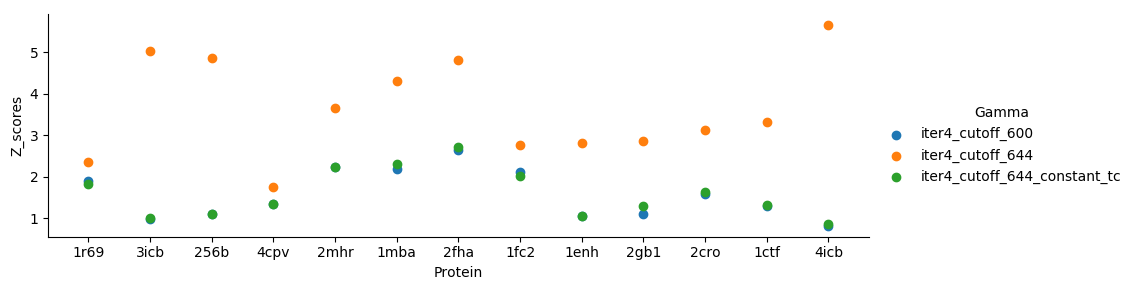

In [31]:
fg = sns.FacetGrid(data=data, hue='Gamma', aspect=3)
fg.map(plt.scatter, 'Protein', 'Z_scores').add_legend()

In [32]:
data.sort_values(["Protein", "Gamma"])

,index,Protein,Z_scores,E_native,E_mgs,Std_mg,Gamma
11,11,1ctf,1.299043,-73.908418,-67.254870,5.121886,iter4_cutoff_600
24,11,1ctf,3.310052,-1.251783,23.035899,7.337553,iter4_cutoff_644
37,11,1ctf,1.314801,-72.083072,-65.287361,5.168623,iter4_cutoff_644_constant_tc
8,8,1enh,1.049447,-98.253966,-89.869253,7.989651,iter4_cutoff_600
21,8,1enh,2.821892,-23.044971,-4.167010,6.689823,iter4_cutoff_644
34,8,1enh,1.048907,-98.980126,-90.353456,8.224440,iter4_cutoff_644_constant_tc
7,7,1fc2,2.104462,-79.213153,-69.493760,4.618470,iter4_cutoff_600
20,7,1fc2,2.773303,-17.337609,-3.766502,4.893482,iter4_cutoff_644
33,7,1fc2,2.016315,-75.256439,-65.910774,4.635023,iter4_cutoff_644_constant_tc
5,5,1mba,2.189210,-329.572502,-298.571777,14.160688,iter4_cutoff_600


In [29]:
data.sort_values(["Protein", "Gamma"])

,index,Protein,Z_scores,E_native,E_mgs,Std_mg,Gamma
11,11,1ctf,1.291859,-73.908418,-67.256101,5.149413,iter4_cutoff_600
24,11,1ctf,3.305078,-1.251783,23.051003,7.353166,iter4_cutoff_644
37,11,1ctf,1.315677,-72.083072,-65.269996,5.178378,iter4_cutoff_644_constant_tc
8,8,1enh,1.023603,-98.253966,-90.051521,8.013311,iter4_cutoff_600
21,8,1enh,2.811968,-23.044971,-4.600195,6.559384,iter4_cutoff_644
34,8,1enh,1.022467,-98.980126,-90.516624,8.277532,iter4_cutoff_644_constant_tc
7,7,1fc2,2.033371,-79.213153,-69.597306,4.729018,iter4_cutoff_600
20,7,1fc2,2.809993,-17.337609,-3.706842,4.850819,iter4_cutoff_644
33,7,1fc2,1.944618,-75.256439,-66.017827,4.750863,iter4_cutoff_644_constant_tc
5,5,1mba,2.183393,-329.572502,-298.651636,14.161843,iter4_cutoff_600


In [ ]:
y_show = "Z_scores"
g = sns.FacetGrid(a, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Qw", y_show, alpha=0.5).add_legend())

In [12]:
data

,index,Protein,Z_scores,E_native,E_mgs,Std_mg,Gamma
0,0,1r69,1.967414,-120.512619,-99.568677,10.645420,iter4_cutoff_600
1,1,3icb,0.949510,-143.442887,-135.176485,8.705970,iter4_cutoff_600
2,2,256b,1.071336,-65.000400,-55.635515,8.741313,iter4_cutoff_600
3,3,4cpv,1.337808,-147.037600,-127.623319,14.512007,iter4_cutoff_600
4,4,2mhr,2.227375,-205.730658,-153.341730,23.520480,iter4_cutoff_600
5,5,1mba,2.183393,-329.572502,-298.651636,14.161843,iter4_cutoff_600
6,6,2fha,2.625908,-257.544541,-215.039131,16.186937,iter4_cutoff_600
7,7,1fc2,2.033371,-79.213153,-69.597306,4.729018,iter4_cutoff_600
8,8,1enh,1.023603,-98.253966,-90.051521,8.013311,iter4_cutoff_600
9,9,2gb1,1.114687,-39.086824,-31.273370,7.009547,iter4_cutoff_600


In [6]:
decoy_n = 200
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iteration_optimization/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/may_2019/gammas/original_gamma"
data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 -1.1196961362678672


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,-1.119696,-74.085447,-84.432999,9.241393
1,3icb,-1.248105,-97.942451,-116.905489,15.193468
2,256b,-1.127843,-126.514286,-142.933573,14.558133
3,4cpv,-1.816566,-139.856600,-183.972851,24.285528
4,2mhr,-1.512029,-143.913085,-177.790631,22.405349
5,1mba,-2.780263,-198.213895,-245.523817,17.016350
6,2fha,-0.893523,-208.326703,-228.402736,22.468400
7,1fc2,-0.296012,-54.879664,-56.346907,4.956691
8,1enh,-0.565915,-54.113328,-60.072024,10.529310
9,2gb1,-0.100692,-65.788891,-66.562665,7.684563


In [36]:
decoy_n = 2000
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/may_2019/gammas/iter1_constant_tc_filtered"
data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 3.899611408119823


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,3.899611,-210.821453,-105.369041,27.041774
1,3icb,6.100403,-273.567459,-128.426927,23.791956
2,256b,3.498349,-225.620666,-131.155938,27.002660
3,4cpv,7.835051,-351.363292,-116.579628,29.965810
4,2mhr,5.217356,-454.202000,-209.632157,46.876207
5,1mba,8.569148,-561.037567,-250.298791,36.262507
6,2fha,7.775092,-594.320733,-273.955254,41.204077
7,1fc2,2.623352,-128.738881,-86.813843,15.981477
8,1enh,3.172390,-155.393041,-90.516241,20.450451
9,2gb1,4.600090,-141.879164,-45.185140,21.020028


In [37]:
folder_list = []
# folder_list = folder_list_1 + folder_list_2
# folder_list = folder_list_1 + folder_list_2
folder_list += folder_list_3
# folder_list += folder_list_4
# folder_list += folder_list_5
# folder_list = [a for a in folder_list if a[-4:] == "frag"]

simulation_location_list_dic = defaultdict(list)
for p in pdb_list:
    # name = p.lower()[:4]
    name = p
    simulation_location_list_dic[name] += folder_list

In [38]:
decoy_n = 2000
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/may_2019/gammas/original_gamma"
data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 0.46113740203796666


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,0.461137,-74.085447,-68.916188,11.209802
1,3icb,0.530676,-97.942451,-86.980741,20.656110
2,256b,0.464460,-126.514286,-117.795926,18.770979
3,4cpv,0.092818,-139.856600,-136.998616,30.791332
4,2mhr,0.397635,-143.913085,-132.735411,28.110418
5,1mba,0.206540,-198.213895,-189.462103,42.373306
6,2fha,0.878587,-208.326703,-181.922314,30.053259
7,1fc2,1.112277,-54.879664,-48.768117,5.494628
8,1enh,0.918676,-54.113328,-48.212541,6.423139
9,2gb1,1.185323,-65.788891,-58.113263,6.475556


In [39]:
decoy_n = 2000
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/may_2019/gammas/iter1_constant_tc_filtered"
data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 1.0419259842542203


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,1.041926,-210.821453,-171.938020,37.318805
1,3icb,1.054830,-273.567459,-209.099977,61.116492
2,256b,0.358308,-225.620666,-205.677664,55.658832
3,4cpv,1.093340,-351.363292,-249.818134,92.876119
4,2mhr,0.963361,-454.202000,-365.528452,92.045976
5,1mba,1.071336,-561.037567,-428.734404,123.493662
6,2fha,1.690924,-594.320733,-428.980587,97.780923
7,1fc2,0.587299,-128.738881,-116.691517,20.513160
8,1enh,-0.093002,-155.393041,-159.246638,41.435573
9,2gb1,1.362269,-141.879164,-94.899248,34.486524


In [40]:
decoy_n = 2000
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/may_2019/gammas/iter2_constant_tc_cutoff600"
data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 1.6761812011001198


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,1.676181,-157.123453,-107.832324,29.406802
1,3icb,2.502209,-206.694521,-129.934022,30.677091
2,256b,2.554656,-160.100778,-86.887471,28.658768
3,4cpv,5.177951,-255.131643,-108.002101,28.414628
4,2mhr,3.375269,-405.719273,-220.968827,54.736516
5,1mba,4.764518,-411.497720,-254.114308,33.032386
6,2fha,7.928048,-523.696647,-224.393722,37.752413
7,1fc2,3.603069,-122.136832,-77.155939,12.484050
8,1enh,2.485098,-142.782053,-93.510102,19.826967
9,2gb1,2.874755,-176.687423,-66.809171,38.221777


In [44]:
folder_list = []
# folder_list = folder_list_1 + folder_list_2
# folder_list = folder_list_1 + folder_list_2
# folder_list += folder_list_3
folder_list += folder_list_4
# folder_list += folder_list_5
folder_list = [a for a in folder_list if a[-4:] == "frag"]
print(folder_list)
simulation_location_list_dic = defaultdict(list)
for p in pdb_list:
    # name = p.lower()[:4]
    name = p
    simulation_location_list_dic[name] += folder_list

['iter2_30_frag', 'iter2_90_frag']


In [45]:
decoy_n = 2000
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/may_2019/gammas/iter2_constant_tc_cutoff600"
data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 1.7631394813995211


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,1.763139,-157.123453,-115.252994,23.747673
1,3icb,3.581716,-206.694521,-135.117173,19.984092
2,256b,1.744850,-160.100778,-108.217139,29.735294
3,4cpv,8.039039,-255.131643,-99.863841,19.314225
4,2mhr,5.208228,-405.719273,-227.576440,34.204116
5,1mba,4.861312,-411.497720,-258.725092,31.426215
6,2fha,7.641316,-523.696647,-240.886033,37.010722
7,1fc2,4.426363,-122.136832,-75.321482,10.576483
8,1enh,1.608667,-142.782053,-105.848422,22.959160
9,2gb1,4.894930,-176.687423,-60.682269,23.699043


In [46]:
decoy_n = 2000
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/may_2019/gammas/iter_2_30"
data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 2.0841542336065193


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,2.084154,-21.928350,-17.458912,2.144485
1,3icb,1.905980,-28.583819,-22.782080,3.043966
2,256b,1.367671,-31.112472,-26.661820,3.254183
3,4cpv,5.800742,-37.373895,-24.323169,2.249837
4,2mhr,4.085990,-49.848577,-35.022843,3.628432
5,1mba,3.943499,-56.698713,-41.298266,3.905275
6,2fha,4.959509,-67.653917,-42.022803,5.168075
7,1fc2,4.346101,-16.287267,-11.562637,1.087096
8,1enh,1.780196,-18.147126,-15.227408,1.640111
9,2gb1,5.347007,-21.869784,-12.061238,1.834399


In [47]:
decoy_n = 2000
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/may_2019/gammas/iter_2_30"
data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



FileNotFoundError: [Errno 2] No such file or directory: '../phis/phi_density_mediated_contact_well_1r69_iter2_90_frag_decoys_lammps_6.5_9.5_5.0_10_2.6_7.0'

In [32]:
decoy_n = 2000
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/may_2019/gammas/original_gamma"
data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 1.5540768444738793


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,1.554077,-74.085447,-63.996423,6.491972
1,3icb,1.061321,-97.942451,-86.165121,11.096861
2,256b,1.051396,-126.514286,-114.989835,10.961096
3,4cpv,2.540061,-139.856600,-116.260410,9.289615
4,2mhr,2.127183,-143.913085,-119.955176,11.262741
5,1mba,2.323983,-198.213895,-163.726192,14.839910
6,2fha,3.693003,-208.326703,-164.704497,11.812123
7,1fc2,2.111659,-54.879664,-46.292348,4.066620
8,1enh,1.337342,-54.113328,-47.742455,4.763833
9,2gb1,1.655923,-65.788891,-56.183723,5.800491


In [17]:
os.chdir("/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3/gammas/cutoff_600"
data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 (2.443173867194681+0j)


/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/dtypes/cast.py:702: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,2.443174,-150.030033,-96.400883,21.950607
1,3icb,2.095709,-196.987304,-134.480901,29.825895
2,256b,2.148350,-159.042001,-96.449062,29.135349
3,4cpv,2.649656,-207.131968,-114.543756,34.943484
4,2mhr,2.738575,-378.564808,-217.604576,58.775186
5,1mba,3.895204,-393.938484,-244.048614,38.480621
6,2fha,5.542767,-467.677815,-222.583426,44.218777
7,1fc2,3.931825,-117.695757,-71.169425,11.833266
8,1enh,1.827016,-109.676787,-79.141576,16.713157
9,2gb1,1.911729,-129.123524,-65.442311,33.310796


In [19]:
decoy_n = 2000
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3/gammas/cutoff_600"
data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 (2.443173867194681+0j)


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,2.443174,-150.030033,-96.400883,21.950607
1,3icb,2.095709,-196.987304,-134.480901,29.825895
2,256b,2.148350,-159.042001,-96.449062,29.135349
3,4cpv,2.649656,-207.131968,-114.543756,34.943484
4,2mhr,2.738575,-378.564808,-217.604576,58.775186
5,1mba,3.895204,-393.938484,-244.048614,38.480621
6,2fha,5.542767,-467.677815,-222.583426,44.218777
7,1fc2,3.931825,-117.695757,-71.169425,11.833266
8,1enh,1.827016,-109.676787,-79.141576,16.713157
9,2gb1,1.911729,-129.123524,-65.442311,33.310796


In [25]:
decoy_n = 2000
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3/gammas/cutoff_600"
gamma_file_name = "/Users/weilu/Research/server/may_2019/gammas/multi_constraint_tc_constant"

data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 (1.219517732686055+0j)


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,1.219518,-64.952432,-57.846260,5.827034
1,3icb,0.016605,-83.859318,-83.671214,11.328423
2,256b,0.078098,-119.083114,-118.256335,10.586477
3,4cpv,0.717414,-116.130000,-107.418584,12.142796
4,2mhr,0.465952,-126.850678,-120.294250,14.071044
5,1mba,1.030381,-165.700232,-146.337662,18.791667
6,2fha,1.276320,-183.706380,-153.665596,23.537027
7,1fc2,2.346848,-45.914730,-38.210134,3.282955
8,1enh,0.478810,-48.287082,-46.546709,3.634786
9,2gb1,1.225149,-56.214546,-50.286244,4.838841


In [30]:
decoy_n = 500
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3/gammas/cutoff_600"
gamma_file_name = "/Users/weilu/Research/server/may_2019/gammas/multi_constraint_tc_constant"

data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 (1.5470154372209417+0j)


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,1.547015,-64.952432,-55.737139,5.956820
1,3icb,0.379045,-83.859318,-79.375645,11.828855
2,256b,0.427606,-119.083114,-114.803929,10.007310
3,4cpv,1.136718,-116.130000,-103.811807,10.836631
4,2mhr,1.014078,-126.850678,-113.577132,13.089271
5,1mba,1.544137,-165.700232,-138.665314,17.508107
6,2fha,1.540155,-183.706380,-150.938333,21.275818
7,1fc2,2.367964,-45.914730,-37.548235,3.533202
8,1enh,0.513742,-48.287082,-46.515958,3.447497
9,2gb1,2.637707,-56.214546,-46.775126,3.578647


In [29]:
decoy_n = 50
n = len(folder_list)
os.chdir("/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/may_2019/iter1_optimization_decoys_2000/optimization_3/gammas/cutoff_600"
gamma_file_name = "/Users/weilu/Research/server/may_2019/gammas/multi_constraint_tc_constant"

data = validate_hamiltonian_wei("phi_list_contact.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



/Users/weilu/opt/pyCodeLib.py:3056: ComplexWarning: Casting complex values to real discards the imaginary part
  e_decoy[i_decoy] = np.dot(gamma, phi_i_decoy[i_decoy])


0 (1.4601907731385355+0j)


/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/dtypes/cast.py:702: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1r69,1.460191,-64.952432,-55.654601,6.367545
1,3icb,0.468320,-83.859318,-78.797922,10.807564
2,256b,0.343982,-119.083114,-115.868678,9.344786
3,4cpv,1.227668,-116.130000,-103.104170,10.610226
4,2mhr,1.055434,-126.850678,-113.592477,12.561843
5,1mba,1.455101,-165.700232,-139.695652,17.871324
6,2fha,1.651213,-183.706380,-149.777339,20.547948
7,1fc2,2.149895,-45.914730,-37.618988,3.858672
8,1enh,0.472556,-48.287082,-46.485579,3.812252
9,2gb1,2.750449,-56.214546,-46.873694,3.396119
